In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from public_tests import *
from typing import Callable
%matplotlib inline

In [2]:
# load the dataset
x_train, y_train = load_data()

In [3]:
x_train

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [4]:
x_train.shape

(97,)

In [5]:
y_train

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [6]:
y_train.shape

(97,)

In [7]:
type(x_train)

numpy.ndarray

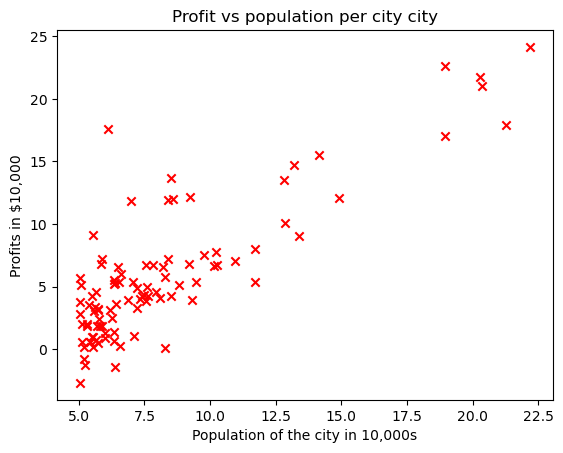

In [8]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profit vs population per city city")
plt.ylabel("Profits in $10,000")
plt.xlabel("Population of the city in 10,000s")
plt.show()

In [9]:
class model:
    def __init__(self, w=0.0, b=0.0):
        self.w = w
        self.b = b
    def __str__(self):
        return f"w = {self.w}, b={self.b}"

linear_model = model()
print(linear_model)

w = 0.0, b=0.0


In [10]:
def inference(population, the_model: model):
    predicted_profit = the_model.w * population + the_model.b
    return predicted_profit

In [22]:
def compute_cost(x: np.ndarray, y: np.ndarray, the_model: model) -> float:
    m = x.shape[0]
    
    predicted_profits = np.zeros(m)
    for i in range(m):
        predicted_profits[i] = inference(x[i], the_model)
    
    squared_deviation = (predicted_profits - y)**2     # vector operation
    # absolute_deviation = np.abs(predicted_profits - y)   # vector operation

    total_cost = 0
    for i in range(m):
        total_cost += squared_deviation[i]
        # total_cost += absolute_deviation[i]
    
    total_cost /= (2*m)
    # total_cost /= m

    return total_cost

In [13]:
compute_cost(x_train, y_train, linear_model)

np.float64(5.964178144329896)

In [28]:
linear_model_2 = model(2, 1)
cost = compute_cost(x_train, y_train, linear_model_2)
print(type(cost))
print(f"Cost at initial w: {cost:.3f}")

# Public tests
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!


In [23]:
def compute_gradient(x: np.ndarray, y: np.ndarray, the_model: model) -> tuple:
    
    dj_dw = dj_db = 0
    m = x.shape[0]

    for i in range(m):
        diff = inference(x[i], the_model) - y[i]
        # if diff:
        #     dj_db_i = diff / abs(diff)
        #     dj_dw_i = (diff / abs(diff)) * x[i]
        # else:
        #     dj_db_i = 0
        #     dj_dw_i = 0

        dj_db_i = diff
        dj_dw_i = diff * x[i]

        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


In [27]:
# linear_model= model()

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, linear_model)
print(f"Gradient at initial w,b (zeros): ", tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w,b (zeros):  -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [16]:
linear_model_3 = model(0.2, 0.2)
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, linear_model_3)
print(f"Gradient at initial w,b (zeros): ", tmp_dj_dw, tmp_dj_db)

Gradient at initial w,b (zeros):  -5.736249484536085 -0.5876288659793815


In [17]:
def gradient_descent(x: np.ndarray, y: np.ndarray, the_model: model, \
                    cost_function: Callable, gradient_function: Callable, alpha: float, num_iters: int) -> tuple:
    
    m = x.shape[0]

    J_history = []
    w_history = []
    # w = the_model.w
    # b = the_model.b
    flexi_model = copy.deepcopy(the_model)

    J_history.append(cost_function(x, y, flexi_model))

    for i in range(num_iters):
        # print(flexi_model.w, flexi_model.b)
        # print(cost_function(x, y, flexi_model))
        
        dj_dw, dj_db = gradient_function(x, y, flexi_model)
        flexi_model.w = flexi_model.w - (alpha * dj_dw)
        flexi_model.b = flexi_model.b - (alpha * dj_db)

        if i < 100000:     # prevent resource exhausion
            J_history.append(cost_function(x, y, flexi_model))

        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(flexi_model.w)
            print(f"Iteration: {i:4} :: Cost: {float(J_history[-1]):8.2f}")

    return flexi_model, J_history, w_history

In [24]:
final_linear_model = model()

alpha = 0.01
iterations = 1500

final_linear_model, _, _ = gradient_descent(x_train, y_train, final_linear_model, compute_cost, compute_gradient, alpha, iterations)

print("w and b found by gradient discent: ", final_linear_model.w, final_linear_model.b)

Iteration:    0 :: Cost:     6.74
Iteration:  150 :: Cost:     5.31
Iteration:  300 :: Cost:     4.96
Iteration:  450 :: Cost:     4.76
Iteration:  600 :: Cost:     4.64
Iteration:  750 :: Cost:     4.57
Iteration:  900 :: Cost:     4.53
Iteration: 1050 :: Cost:     4.51
Iteration: 1200 :: Cost:     4.50
Iteration: 1350 :: Cost:     4.49
w and b found by gradient discent:  1.166362350335582 -3.63029143940436


In [25]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = inference(x_train[i], final_linear_model)

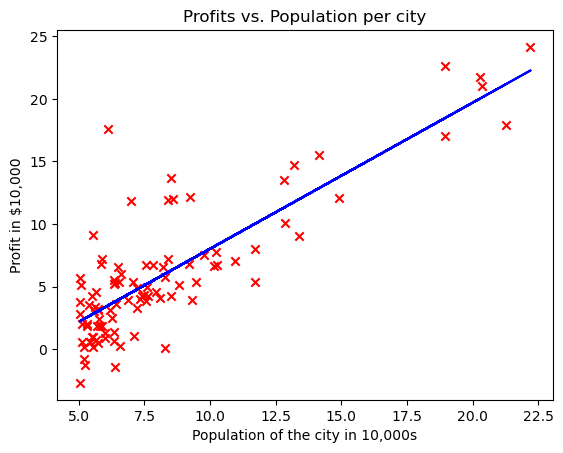

In [26]:
plt.plot(x_train, predicted, c = "b")
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profits vs. Population per city")
plt.ylabel("Profit in $10,000")
plt.xlabel("Population of the city in 10,000s")
plt.show()

In [21]:
predict1 = 3.5 * final_linear_model.w + final_linear_model.b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * final_linear_model.w + final_linear_model.b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $10899.42
For population = 70,000, we predict a profit of $44534.93
